In [ ]:
# Exploratory Data Analysis (EDA)

#This notebook contains exploratory data analysis on the Online Retail dataset.
I#ncludes data cleaning, missing value analysis, and RFM distribution plots.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("Online Retail.csv")
df.head()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom


In [3]:
df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [4]:
df.isnull().sum()


InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [5]:
df_clean = df.dropna(subset=["CustomerID"])


In [6]:
df_clean.shape


(406829, 8)

In [7]:
df_clean = df_clean[
    (~df_clean["InvoiceNo"].astype(str).str.startswith("C")) &
    (df_clean["Quantity"] > 0)
]


In [8]:
df_clean.shape


(397924, 8)

In [10]:
df_clean["InvoiceDate"] = pd.to_datetime(df_clean["InvoiceDate"], errors="coerce")
df_clean["TotalPrice"] = df_clean["Quantity"] * df_clean["UnitPrice"]


In [11]:
df_clean[["InvoiceDate", "Quantity", "UnitPrice", "TotalPrice"]].head()


,InvoiceDate,Quantity,UnitPrice,TotalPrice
0,2010-01-12 08:26:00,6,2.55,15.30
1,2010-01-12 08:26:00,6,3.39,20.34
2,2010-01-12 08:26:00,8,2.75,22.00
3,2010-01-12 08:26:00,6,3.39,20.34
4,2010-01-12 08:26:00,6,3.39,20.34


In [12]:
# Shape of data
df_clean.shape
df_clean.info()
df_clean.describe()


<class 'pandas.core.frame.DataFrame'>
Index: 397924 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    397924 non-null  object        
 1   StockCode    397924 non-null  object        
 2   Description  397924 non-null  object        
 3   Quantity     397924 non-null  int64         
 4   InvoiceDate  168649 non-null  datetime64[ns]
 5   UnitPrice    397924 non-null  float64       
 6   CustomerID   397924 non-null  float64       
 7   Country      397924 non-null  object        
 8   TotalPrice   397924 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 30.4+ MB


,Quantity,InvoiceDate,UnitPrice,CustomerID,TotalPrice
count,397924.000000,168649,397924.000000,397924.000000,397924.000000
mean,13.021823,2011-05-16 06:47:29.429525248,3.116174,15294.315171,22.394749
min,1.000000,2010-01-12 08:26:00,0.000000,12346.000000,0.000000
25%,2.000000,2011-03-05 12:12:00,1.250000,13969.000000,4.680000
50%,6.000000,2011-06-09 09:51:00,1.950000,15159.000000,11.800000
75%,12.000000,2011-09-06 13:08:00,3.750000,16795.000000,19.800000
max,80995.000000,2011-12-10 17:19:00,8142.750000,18287.000000,168469.600000
std,180.420210,NaN,22.096788,1713.169877,309.055588


In [ ]:
#Top countries by number of orders

top_countries = df_clean["Country"].value_counts().head(10)
top_countries


Country
United Kingdom    354345
Germany             9042
France              8342
EIRE                7238
Spain               2485
Netherlands         2363
Belgium             2031
Switzerland         1842
Portugal            1462
Australia           1185
Name: count, dtype: int64

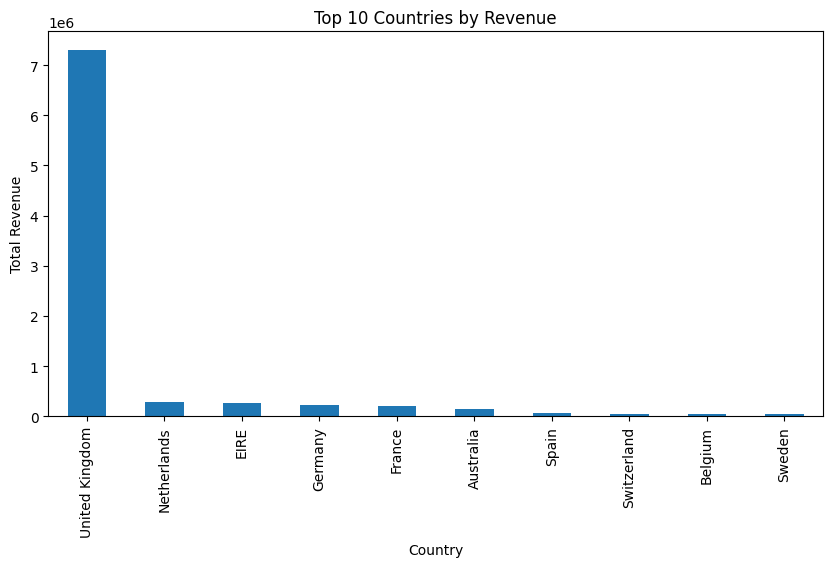

In [14]:
import matplotlib.pyplot as plt

revenue_by_country = (
    df_clean.groupby("Country")["TotalPrice"]
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

revenue_by_country.plot(kind="bar", figsize=(10,5))
plt.title("Top 10 Countries by Revenue")
plt.ylabel("Total Revenue")
plt.xlabel("Country")
plt.show()


In [15]:
# Create reference date (last invoice date + 1 day)
reference_date = df_clean["InvoiceDate"].max() + pd.Timedelta(days=1)

rfm = df_clean.groupby("CustomerID").agg({
    "InvoiceDate": lambda x: (reference_date - x.max()).days,  # Recency
    "InvoiceNo": "nunique",                                    # Frequency
    "TotalPrice": "sum"                                        # Monetary
})

rfm.columns = ["Recency", "Frequency", "Monetary"]
rfm.head()


,Recency,Frequency,Monetary
CustomerID,,,
12346.0,NaN,1,77183.60
12347.0,96.0,7,4310.00
12348.0,221.0,4,1797.24
12349.0,NaN,1,1757.55
12350.0,312.0,1,334.40


In [16]:
rfm.describe()


,Recency,Frequency,Monetary
count,2997.000000,4339.000000,4339.000000
mean,155.358358,4.271952,2053.793018
std,140.146796,7.705493,8988.248381
min,1.000000,1.000000,0.000000
25%,40.000000,1.000000,307.245000
50%,125.000000,2.000000,674.450000
75%,219.000000,5.000000,1661.640000
max,698.000000,210.000000,280206.020000


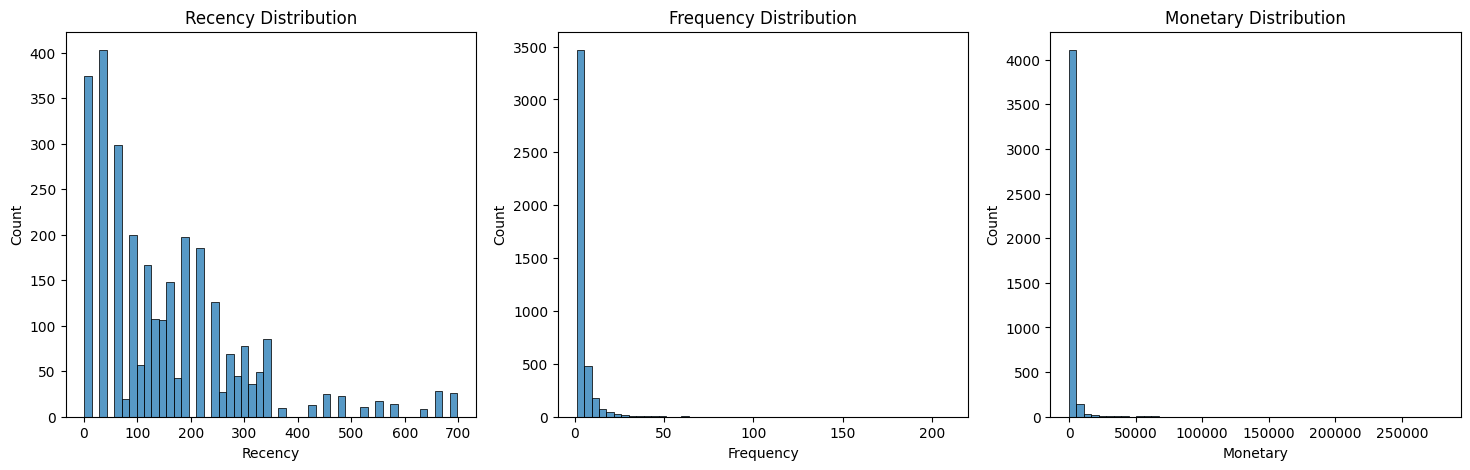

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.histplot(rfm["Recency"], bins=50, ax=axes[0])
axes[0].set_title("Recency Distribution")

sns.histplot(rfm["Frequency"], bins=50, ax=axes[1])
axes[1].set_title("Frequency Distribution")

sns.histplot(rfm["Monetary"], bins=50, ax=axes[2])
axes[2].set_title("Monetary Distribution")

plt.show()


## Key EDA Insights

- Majority of customers are low-frequency buyers
- Monetary value is highly right-skewed, indicating a few high-value customers
- Many customers have not purchased recently, showing churn potential
- CustomerID has a large number of missing values which were handled during data cleaning
- RFM distributions helped understand customer behavior patterns

